In [6]:
import sys
sys.path.append('/nuwa_cluster/home/jackyu/climatools/')
import climatools.dates as climadates

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [13]:
cmaps = [m for m in plt.cm.datad if not m.endswith('_r')]
cmaps.sort()
len(cmaps)

72

In [17]:
def grayify_cmap(cmap):
    """Return a grayscale version of the colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

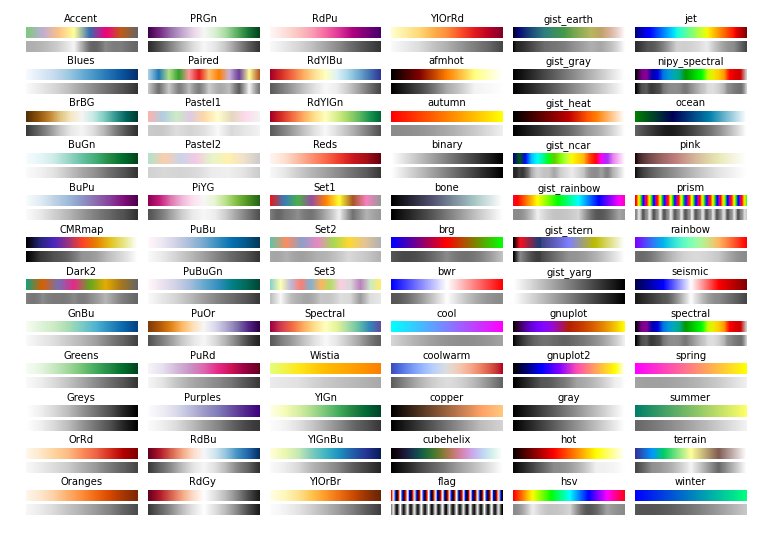

In [18]:
fig, axes = plt.subplots(36, 6, figsize=(10, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                    hspace=0.1, wspace=0.1)

im = np.outer(np.ones(10), np.arange(100))

cmaps = [m for m in plt.cm.datad if not m.endswith("_r")]
cmaps.sort()

axes = axes.T.ravel()
for ax in axes:
    ax.axis('off')

for cmap, color_ax, gray_ax, null_ax in zip(cmaps, axes[1::3], axes[2::3], axes[::3]):
    del null_ax
    color_ax.set_title(cmap, fontsize=10)
    color_ax.imshow(im, cmap=cmap)
    gray_ax.imshow(im, cmap=grayify_cmap(cmap))
